#### importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#### importing datasets

In [2]:
data=pd.read_excel("hotel_reviews.xlsx")
data.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [3]:
data.tail()

,Review,Rating
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1
20490,"people talking, ca n't believe excellent ratin...",2


In [4]:
data.shape

(20491, 2)

In [5]:
data.describe()

,Rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [7]:
data.isnull().sum()

Review    0
Rating    0
dtype: int64

In [8]:
data.duplicated().sum()

0

#### Observation: 
1. Total 20491 reviews avilable.
2. No null values and duplicate entries.
3. Min. Rating is 1 and Max. Rating is 5.

<AxesSubplot:xlabel='Rating'>

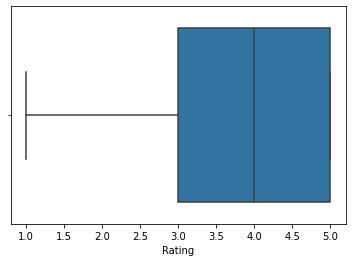

In [9]:
sns.boxplot(data['Rating'])

<AxesSubplot:xlabel='Rating', ylabel='count'>

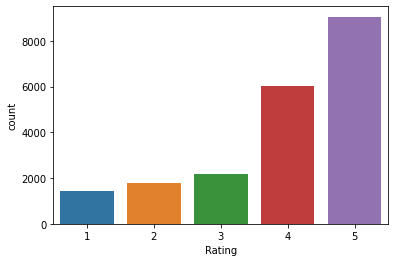

In [10]:
sns.countplot(data['Rating'])

#### Observation :
Maximum No of rating is for 5.

<AxesSubplot:title={'center':'Percentage of Ratings'}, ylabel='Rating'>

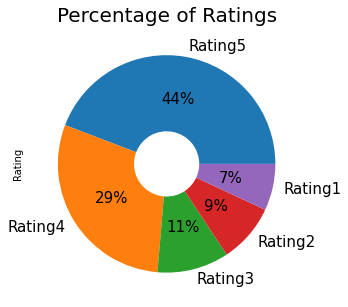

In [11]:
plt.figure(figsize=(10,5))
plt.title('Percentage of Ratings', fontsize=20)
data.Rating.value_counts().plot(kind='pie', labels=['Rating5', 'Rating4', 'Rating3', 'Rating2', 'Rating1'],
                              wedgeprops=dict(width=.7), autopct='%1.0f%%', textprops={'fontsize': 15})

#### Without Space

Max length: 1931, Min length: 7, Average Length :  104.37572592845639


<AxesSubplot:>

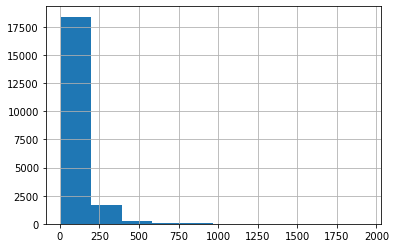

In [12]:
data['len']= data['Review'].str.split().map(lambda x: len(x))
print('Max length: {}, Min length: {}, Average Length :  {}'.format(max(data['len']),min(data['len']),data['len'].mean()))
data['len'].hist()

#### With Space

Max length: 13501, Min length: 44, Average Length :  725.245571226392


<AxesSubplot:>

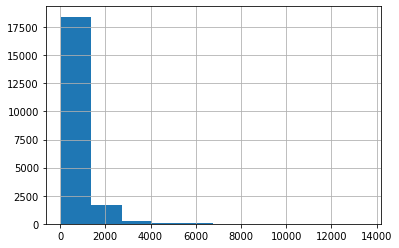

In [13]:
data['len']= data['Review'].str.len()
print('Max length: {}, Min length: {}, Average Length :  {}'.format(max(data['len']),min(data['len']),data['len'].mean()))
data['len'].hist()

#### Word Cloud

##### Positive

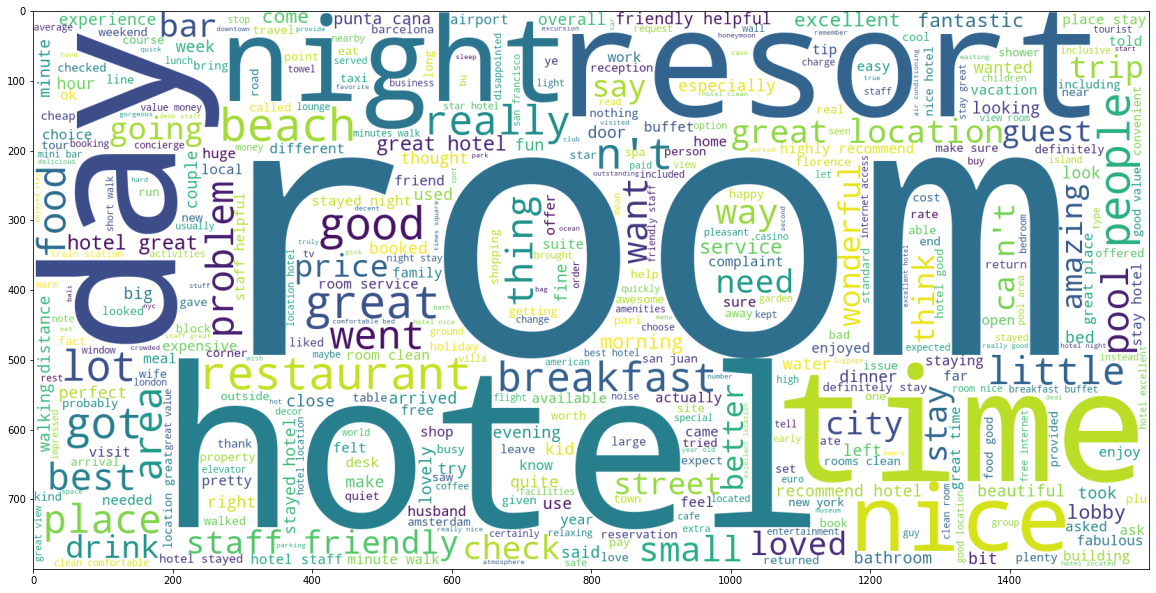

In [14]:
from wordcloud import WordCloud
plt.figure(figsize=(20,20))
pos_wc = WordCloud(max_words=2000, min_font_size=10, 
                height=800,width=1600,background_color="white").generate(" ".join(data[data["Rating"]>3].Review))
plt.imshow(pos_wc)

##### Neutral

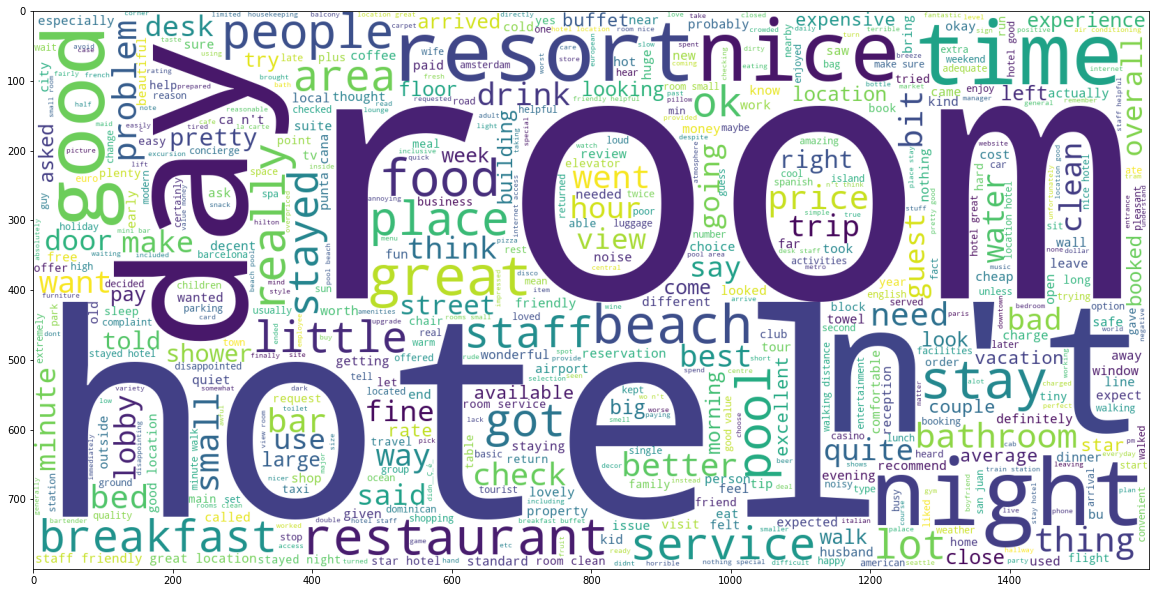

In [15]:
plt.figure(figsize=(20,20))
neu_wc = WordCloud(max_words=2000, min_font_size=10, 
                height=800,width=1600,background_color="white").generate(" ".join(data[data["Rating"]==3].Review))
plt.imshow(neu_wc)

##### Negeative

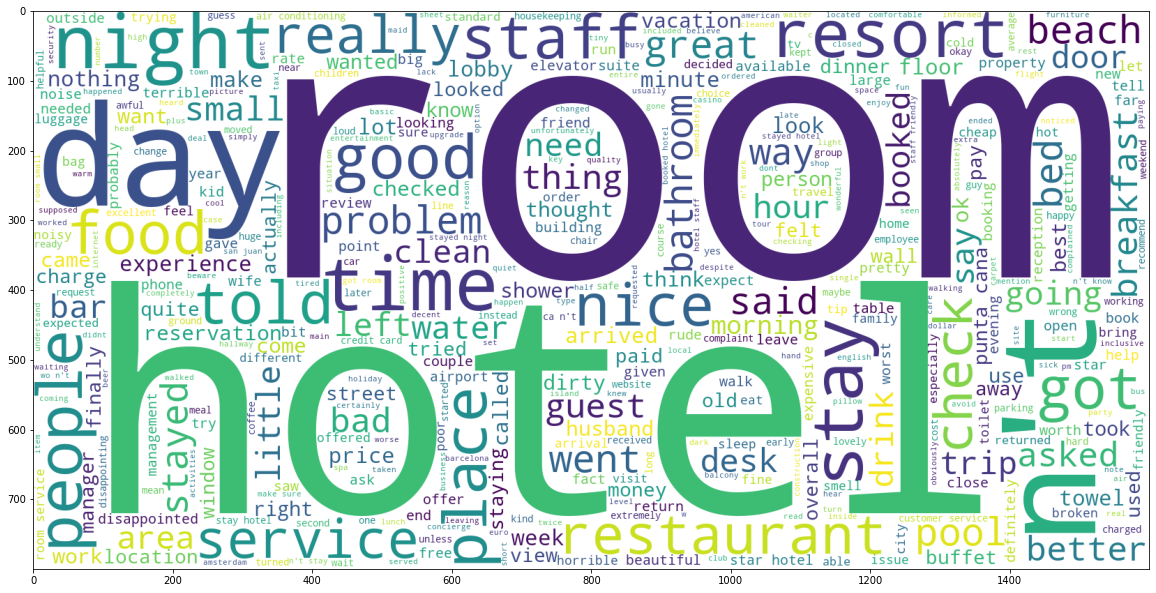

In [16]:
plt.figure(figsize=(20,20))
neg_wc = WordCloud(max_words=2000, min_font_size=10, 
                height=800,width=1600,background_color="white").generate(" ".join(data[data["Rating"]<3].Review))
plt.imshow(neg_wc)

#### It is essential that the text data be preprocessed.
1. Tokenization
2. Normalization
3. Stopword removal
4. Lemmatization & Stemmimg

In [17]:
import re 
import string

def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text) 
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)

In [18]:
data["Review"] = data["Review"].apply(clean)

In [19]:
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [20]:
data['New_Review'] = data['Review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [21]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [22]:
result = []

for i in data["New_Review"]:
    word = i.split()
    stemmed_tokens = [ps.stem(w) for w in word]

In [23]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

result = []


for i in data["New_Review"]:
    word = i.split()
    lemme_tokens = [lemmatizer.lemmatize(w) for w in word]
    r = " ".join(lemme_tokens)
    result.append(r)

In [24]:
data["New_Review"] = result

In [25]:
data

,Review,Rating,len,New_Review
0,nice hotel expensive parking got good deal sta...,4,593,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,1689,ok nothing special charge diamond member hilto...
2,nice rooms not experience hotel monaco seattl...,3,1427,nice room experience hotel monaco seattle good...
3,unique great stay wonderful time hotel monaco ...,5,600,unique great stay wonderful time hotel monaco ...
4,great stay great stay went seahawk game awesom...,5,1281,great stay great stay went seahawk game awesom...
...,...,...,...,...
20486,best kept secret time staying charm not ca n...,5,733,best kept secret time staying charm ca nt beat...
20487,great location price view hotel great quick pl...,4,306,great location price view hotel great quick pl...
20488,ok just looks nice modern outside desk staff n...,2,443,ok look nice modern outside desk staff nt part...
20489,hotel theft ruined vacation hotel opened sept ...,1,5557,hotel theft ruined vacation hotel opened sept ...


#### Feature Extraction
1. BoW: CountVectorizer
2. TFIDF
3. Unigrams/Bigrams/Trigrams

In [26]:
data.New_Review.replace({'ca nt': 'can not','nt':'not'}, regex=True,inplace=True)

#### Unigrams

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_unigram(corpus,n=None):
    vec1 = CountVectorizer(ngram_range=(1,1),max_features=2000).fit(corpus)
    bow=vec1.transform(corpus)
    sum_words=bow.sum(axis=0)
    words_freq = [(word,sum_words[0,idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq = sorted(words_freq,key = lambda x: x[1],reverse=True)
    return words_freq[:n]

In [28]:
unigram_words = get_top_unigram(data['New_Review'],n=200)
unigram_df = pd.DataFrame(unigram_words)
unigram_df.columns = ["Uni-grams", "Frequency"]

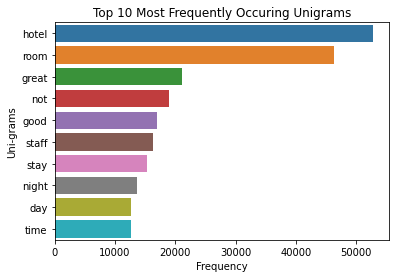

In [29]:
sns.barplot(x=unigram_df['Frequency'][:10], y=unigram_df['Uni-grams'][:10])
plt.title('Top 10 Most Frequently Occuring Unigrams')
plt.show()

#### Bigrams

In [30]:
def get_top_bigram(corpus,n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),max_features=2000).fit(corpus)
    bow=vec1.transform(corpus)
    sum_words=bow.sum(axis=0)
    words_freq = [(word,sum_words[0,idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq = sorted(words_freq,key = lambda x: x[1],reverse=True)
    return words_freq[:n]

In [31]:
bigram_words = get_top_bigram(data['New_Review'],n=200)
bigram_df = pd.DataFrame(bigram_words)
bigram_df.columns = ["Bi-grams", "Frequency"]

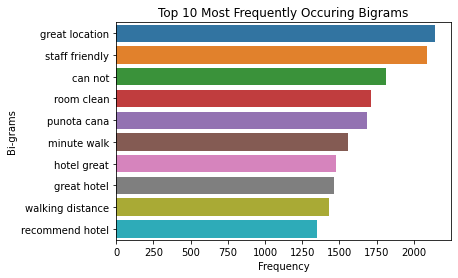

In [32]:
sns.barplot(x=bigram_df['Frequency'][:10], y=bigram_df['Bi-grams'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()

#### Trigrams

In [33]:
def get_top_trigram(corpus,n=None):
    vec1 = CountVectorizer(ngram_range=(3,3),max_features=2000).fit(corpus)
    bow=vec1.transform(corpus)
    sum_words=bow.sum(axis=0)
    words_freq = [(word,sum_words[0,idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq = sorted(words_freq,key = lambda x: x[1],reverse=True)
    return words_freq[:n]

In [34]:
trigram_words = get_top_trigram(data['New_Review'],n=200)
trigram_df = pd.DataFrame(trigram_words)
trigram_df.columns = ["Tri-grams", "Frequency"]

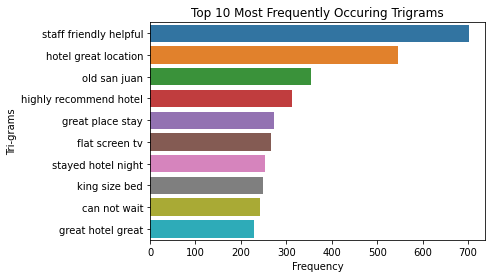

In [35]:
sns.barplot(x=trigram_df['Frequency'][:10], y=trigram_df['Tri-grams'][:10])
plt.title('Top 10 Most Frequently Occuring Trigrams')
plt.show()

#### Polarity

In [36]:
import textblob
from textblob import TextBlob

In [37]:
data["Polarity"]=(round(data['New_Review'].apply(lambda x:TextBlob(x).sentiment.polarity),4))
data.head()

,Review,Rating,len,New_Review,Polarity
0,nice hotel expensive parking got good deal sta...,4,593,nice hotel expensive parking got good deal sta...,0.2592
1,ok nothing special charge diamond member hilto...,2,1689,ok nothing special charge diamond member hilto...,0.2486
2,nice rooms not experience hotel monaco seattl...,3,1427,nice room experience hotel monaco seattle good...,0.3071
3,unique great stay wonderful time hotel monaco ...,5,600,unique great stay wonderful time hotel monaco ...,0.4466
4,great stay great stay went seahawk game awesom...,5,1281,great stay great stay wenot seahawk game aweso...,0.4696


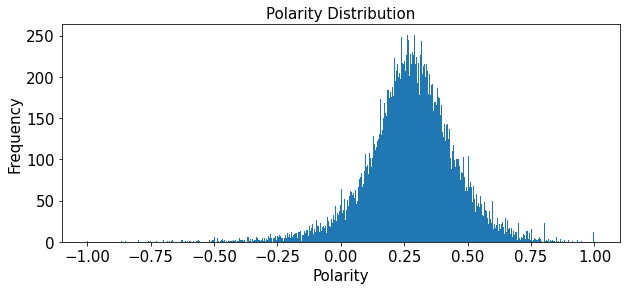

In [38]:
plt.figure(figsize=(10,4))
plt.hist(data['Polarity'],bins=500)
plt.xlabel('Polarity', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.yticks(fontsize=15)
plt.title('Polarity Distribution', fontsize=15)
plt.show()

#### Observation : Polarity most of the values ranges from 0.00 to 0.50

In [39]:
from afinn import Afinn
afn = Afinn()
scores = [afn.score(article) for article in data['New_Review']]
sentiment = ['positive' if score > 0
                          else 'negative' if score < 0
                              else 'neutral'
                                  for score in scores]
data['Scores'] = scores
data['Sentiment'] = sentiment

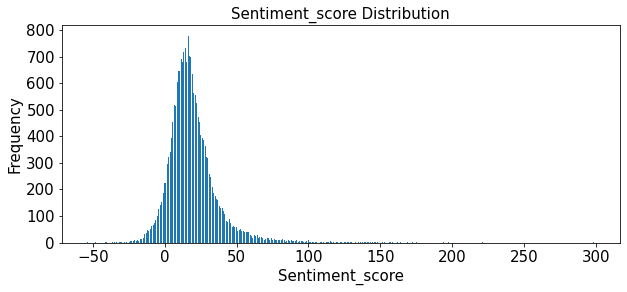

In [40]:
plt.figure(figsize=(10,4))
plt.hist(data['Scores'],bins=500)
plt.xlabel('Sentiment_score', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.yticks(fontsize=15)
plt.title('Sentiment_score Distribution', fontsize=15)
plt.show()

#### Observation : Most of the score between 0 to 40

<AxesSubplot:ylabel='Sentiment'>

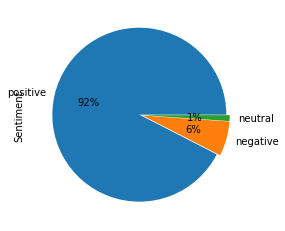

In [41]:
sent_pie=data['Sentiment'].value_counts()
sent_pie.plot(kind='pie', autopct='%.0f%%',explode=[0.02,0.02,0.02])

#### TF-IDF Vectorizier

In [42]:
Positve=data[data['Sentiment']=='positive']
Neutral=data[data['Sentiment']=='neutral']
Negative=data[data['Sentiment']=='negative']

In [43]:
positive_reviews=Positve['New_Review']
neutral_reviews=Neutral['New_Review']
negative_reviews=Negative['New_Review']

#### Positive Reviews

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 5000)
tf_idf_matrix =tv.fit_transform(positive_reviews)

In [45]:
def get_top_n2_words(corpus, n=None):
    vec1 = TfidfVectorizer(ngram_range=(2,2),max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [46]:
Positive_Bi_words = get_top_n2_words(positive_reviews, n=200) #top 200
Positive_Bi = pd.DataFrame(Positive_Bi_words)
Positive_Bi.columns=["Bi-gram", "Frequency"]

[Text(0, 0, 'great location'),
 Text(1, 0, 'staff friendly'),
 Text(2, 0, 'room clean'),
 Text(3, 0, 'great hotel'),
 Text(4, 0, 'hotel great'),
 Text(5, 0, 'can not'),
 Text(6, 0, 'walking distance'),
 Text(7, 0, 'minute walk'),
 Text(8, 0, 'stayed night'),
 Text(9, 0, 'friendly helpful'),
 Text(10, 0, 'recommend hotel'),
 Text(11, 0, 'stayed hotel'),
 Text(12, 0, 'punota cana'),
 Text(13, 0, 'hotel room'),
 Text(14, 0, 'hotel stayed'),
 Text(15, 0, 'hotel staff'),
 Text(16, 0, 'place stay'),
 Text(17, 0, 'staff helpful'),
 Text(18, 0, 'room service'),
 Text(19, 0, 'room small')]

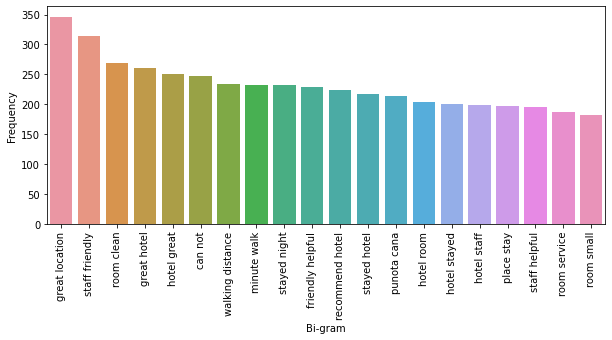

In [47]:
top20_bigram = Positive_Bi.iloc[0:20,:]
fig = plt.figure(figsize = (10, 4))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Frequency"])
plot.set_xticklabels(rotation=90,labels = top20_bigram["Bi-gram"])

#### Negative Reviews

In [48]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
Negative_Bi_words = get_top_n2_words(negative_reviews, n=200) 
Negative_Bi = pd.DataFrame(Negative_Bi_words)
Negative_Bi.columns=["Bi-gram", "Frequency"]

[Text(0, 0, 'credit card'),
 Text(1, 0, 'stay hotel'),
 Text(2, 0, 'hotel room'),
 Text(3, 0, 'customer service'),
 Text(4, 0, 'punota cana'),
 Text(5, 0, 'star hotel'),
 Text(6, 0, 'worst hotel'),
 Text(7, 0, 'stayed hotel'),
 Text(8, 0, 'hotel staff'),
 Text(9, 0, 'can not'),
 Text(10, 0, 'room service'),
 Text(11, 0, 'room small'),
 Text(12, 0, 'hotel stayed'),
 Text(13, 0, 'not stay'),
 Text(14, 0, 'air conditioning'),
 Text(15, 0, 'room room'),
 Text(16, 0, 'room not'),
 Text(17, 0, 'room hotel'),
 Text(18, 0, 'not work'),
 Text(19, 0, 'got room')]

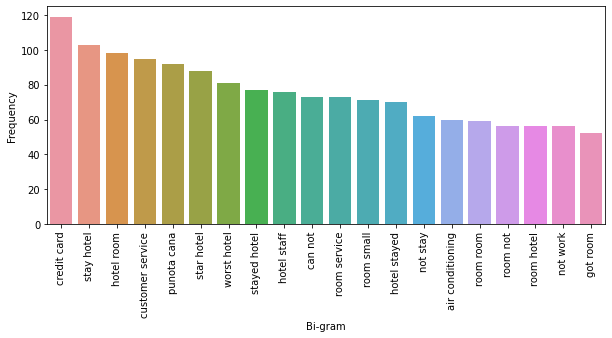

In [50]:
top20_bigram = Negative_Bi.iloc[0:20,:]
fig = plt.figure(figsize = (10, 4))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Frequency"])
plot.set_xticklabels(rotation=90,labels = top20_bigram["Bi-gram"])

In [51]:
data.to_csv('Final Data.csv')